# Continuous Time Markov Processes (CTMC)

Be sure to import Symbulate using the following commands.

In [1]:
from symbulate import *
%matplotlib inline

A **continuous time Markov chain** is a continuous time, discrete state random process which satisfies for all $t$:

Given $X_t$ ("the present"), $(X_{u},u \ge t)$ ("the future") is conditionally independent of $(X_{s}, s \le t )$ ("the past"). 

In a discrete time Markov chain, state transitions occur at every point in time, $n = 0, 1, 2, \ldots$.  A continuous time Markov chain behaves like a discrete time Markov chain in which the times between state transitions are independent and exponentially distributed.

* The amount of time a chain stays in a state has an exponential distribution, with a rate parameter that can depend on the current state.
* When the chain "jumps" to a new state, the jumps behave like a discrete time Markov chain.
* The times between jumps are independent.


In Symbulate a continuous time Markov chain is defined with `ContinuousTimeMarkovChain`.  The probabilistic behavior of a continuous time Markov chain is fully specified by the following, which are the parameters of `ContinuousMarkovChain`.

* `state_labels`: The **state space** of possible values of the process.  (Default is to label the states 0, 1, 2, ...)
* `initial_dist`: The **initial distribution**, which specifies the probability distribution at time 0
* `generator_matrix`: The **generator matrix** or **transition rate matrix**, $Q$, whose $(i, j)$  entry specifies the rate at which the chain "attempts to transition" to state $j$ given that it is currently in state $i$.
  * For small $h$, $P(X_{t+h} = j\, | X_t = i) \approx h q(i,j)$
  * The total departure rate from states $i$ is $\lambda(i) = \sum_{j\neq i} q(i,j)$
  * The diagonal entries are the $-1$ times the total departure rates from each state, $q(i,i) = -\lambda(i)$, so that the all row sums are 0.
  * The probability that when the chain departs state $i$ it jumps to state $j$ is $q(i,j)/\lambda(i)$.

*Example.* The weather in a certain city can be classified as either cloudy, rainy, or sunny and follows a continuous time Markov chain.
* Given that it is cloudy currently, it will next be rainy with probability 0.3, or sunny with probability 0.7.
* Given that it is rainy currently, it will next be cloudy with probability 0.6 or sunny with probability 0.4.
* Given that it is sunny currently, it will next be cloudy with probability 1.
* On average it stays cloudy for 2 days, rainy for 1 day, and sunny for 3 days.

Suppose that it is currently sunny.

In [8]:
states = ["cloud", "rain", "sun"]

Q = [[-0.50, 0.15, 0.35],
     [ 0.60,   -1, 0.40],
     [  1/3,  0.0, -1/3]]

InitialDistribution = [0, 0, 1] # sunny currently

X = ContinuousTimeMarkovChain(Q, InitialDistribution, states)

If it is currently sunny, find the probability that it is raining 36 hours from now.

In [10]:
X[1.5].sim(10000).tabulate(normalize = True)

cloud,0.2774
rain,0.0236
sun,0.699
Total,0.9999999999999999


Given that it is raining 36 hours from now, find the probability that it is sunny 48 hours from now.

In [11]:
(X[2] | (X[1.5] == "rain")).sim(1000).tabulate(normalize = True)

cloud,0.225
rain,0.612
sun,0.163
Total,1.0


#### State labels

As for discrete time Markov chains, the state space for a continuous time Markov chain can be any list of values (like ['cloud', 'rain', 'sun']).  If `state_labels` are not specified, the default is to label the states 0, 1, 2, ...  When the states are numerical values, plots can be created, and methods like `.mean()` and `.sd()` can be applied.

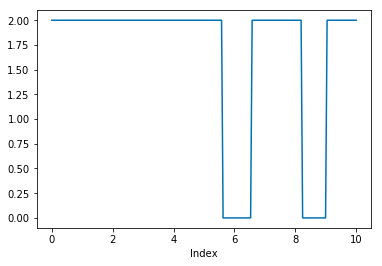

In [2]:
Q = [[-0.50, 0.15, 0.35],
     [ 0.60,   -1, 0.40],
     [  1/3,  0.0, -1/3]]


InitialDistribution = [0, 0, 1] # sunny currently

X = ContinuousTimeMarkovChain(Q, InitialDistribution)

X.sim(1).plot(alpha = 1)

We can look at the different arrival times and interarrival times by creating a RV and using the `arrival_times` and `interarrival_times` functions.

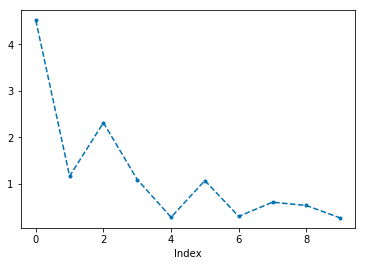

In [7]:
T = RV(X, interarrival_times)
T.sim(1).plot()

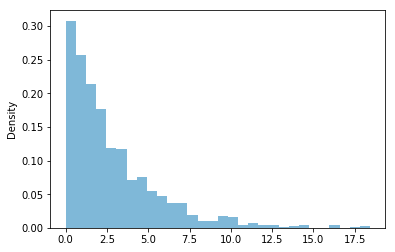

In [8]:
T[0].sim(1000).plot()